# Data Cleaning and text analysis
Free data from Ordnungsamt 

Author: Karina Condeixa


Data from the column 'Sachverhalt'has been analysed. 

We deal with the text into lines and words: remove numbers and characters, transform to lowercase, tokeneize words, remove stopwords.

Wordclouds for english and german languages were build to visualize the most repeated words and check differences between the two languages.

#### The most frequent words in english
- mattress
- furniture
- chair
- closet
- couch
- sofa
- table
- carpet
- board
- wardrobe
- shelf
- cabinet
- frame
- desk
- cupboard
- stroller
- suitcase

#### The most frequent words in german
- Einkaufswagen
- Matratze
- Kuhlschrank
- Stuhle
- Fahrrad
- Tische
- Sessel

Einkaufswagen and Sessel were new words here. 

Some possible translations with compound names were included (e.g. 'baby carriage', 'caddy', 'shopping cart', 'shopping trolley', 'shopping venture', 'wood shelf'). 

It is possible that Sessel has been translated to chair instead if armchair. So, it was disregarded.


### Suggestion for improvement
- Consider also compound_words (e.g. baby carriage, shopping trolling)


In [1]:
# import the libraries
# import json
import pandas as pd
import nltk # to remove stopwords
from nltk.corpus import stopwords # to remove stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# import wordcloud # to check repeated words
import re 
import string # to remove punctuation


### Working with the string 
It come from a column at the API, translated into item 

In [2]:
# define the string
strings_in_item = '''
Mirror
wood/shelf parts
bulky waste
bulky waste
Very dear team,
On Gradestraße, between the heights of Hornbach and Gottlieb-Dunkel-Straße in the direction of Schöneberg, there is currently a great deal of rubbish and rubbish right into the cycle path. I've been cycling this route for over 10 years and I've noticed that the garbage keeps increasing. Most of the time there was a lot of rubbish around the glass containers, but now there is a pile of rubbish under every tree. My heart is bleeding. But I can't think of any way to counteract this problem. (maybe wildlife cams?)
Best regards
bulky waste
Broken roll colli?
well
well
between Neuhofer Straße and Lockenhuhnweg - especially opposite. 56
garbage garbage garbage
panels, wood
furniture and pallets; 1 black sack
rubbish, bulky waste
On the sidewalk opposite house number 57
There are more and more broken chairs and tables
Blue bags, construction waste
Various garbage dumps on the Columbiadamm
bulky waste
weekly rule message
Parasite tenants in Berlin are active again - unfortunately.
Bodenholz parts are lying on the former cycle path see photo
Rubble, household waste, wood, cardboard, folding bed
Sheetrock, electronic scrap, buckets of paint, bulky waste
Ancient, filthy prams
Carcinogenic substances next to the playground. Please install lighting on Nernstweg. Then maybe the nocturnal garbage dumping will finally stop. And then maybe the drug trade won't be done there anymore. The Nernstweg has degenerated into a dump. At night, many people don't dare go there anymore. Please help us!
Bulky waste was dumped on two trees on Columbiadamm near the Rixdorfer Teich.
Big pack mi municipal waste shopping trolley
furniture, rubbish bag,
garbage of all kinds
Plastic, fabric upholstery, bar stools, wooden parts
A bed was dumped illegally
DON'T DONE YOUR HAINIS!!!!
DAILY UPDATE PHOTO 4.11. reported for 4!!!!WEEKS
DO YOUR JOB!!!!
look here
old message, same shit
Message "Bulky waste dumped"
WHAT?
bulky waste dumped
Couch, armchair, dirt
WHERE?
+
−
Leaflet
Karl-Marx-Platz 15
12043 Neukölln
Street next to Dixie toilet
STATUS INFORMATION
Status: Done
Report date: 10/11/2022 - 5:46 p.m
Message number: hctedd, kc3669
Status: Done (03.11.2022 - 06:44)
FEEDBACK FROM THE Ordnungsamt Neukölln
Thank you for your reference.
The disruption was forwarded to the Berlin city cleaning department on October 12, 2022 for processing.
The Berlin city cleaning department informed us on November 3rd, 2022 that the matter had been settled.
DON'T DONE YOUR HAINIS!!!!
MATTRESSES, CLOTHES, BOARDS
Garbage
various bulky waste
Ladies and Gentlemen
For at least five weeks, bulky waste and other rubbish has been piling up again on the cycle path and footpath on Gradestraße from around house number 60 to almost the allotment garden in front of the Gradestraße bridge, especially in the area of the glass containers. Some of the cycle path is now no longer passable. I would like to ask you to remedy this. Why do complaints and information from citizens always have to be made first? The public order office drives vehicles along this route regularly and the topic of the garbage that is disposed of there particularly often should be well known. This is annoying. Maybe video cameras should be installed there to catch the illegal disposal companies. I can bet that if the rubbish was in the lanes of the cars, it would be gone in no time. I am curious to see how long it will take to remove the rubbish from the bike/footpath this time.
Best regards
Ines Paessler
Bulky waste in the green strip, unfortunately something new is always added :/
Old mattress wood
Illegal dumping of bulky waste
bulky waste
Extreme littering of the green strip and the street corners along the sidewalk coming from Karl-Marx-Strasse. Sidewalk is currently impassable. Since there are two day care centers in the street, children and parents are sometimes forced to walk on the road to avoid the rubbish.
bulky waste
Euro pallet, rubbish bags
various couches
Two-piece bedstead has been discarded
mattresses
furniture parts (kitchen)
Patio doors with glazing
mattress
bulky waste
rubbish, bulky waste
Under the pedestrian bridge and at the entrance to the city motorway: bulky waste, sofas, tables, rubbish
wooden boards.
well
empty paint buckets
couch
In addition to the large amounts of rubbish in the parking lot under the bridge, large amounts of bulky waste have accumulated on the embankment, including a large sofa.
Old, very heavy safe, rubbish dump next to it
car part
Mattress approx. 1.20 m x 1.40 m
Wood
Wood
3 window frames
bulky waste
broken car windshield
various garbage deposits on sidewalk
A presumably defective lamp was disposed of directly in front of my property on the green strip.
mattress
On the pavement
Boards and various other bags that are added daily.
Garbage dumped for 4 days
  Mattress lies preschool
There's a white desk on the sidewalk
Broken roller shutters simply on the sidewalk, risk of tripping
wooden boards
slats
slats
bulky waste
2x chairs
household items
There is an office chair and one on the cycle path, and the garbage has been distributed and a wooden board see photo
1 armchair
1 large mattress
various approx. 3 m³
Mattress dumped on the street.
Mattress leaning against a fence
The mattress is constantly thrown on the bank by the market operators and then somehow ends up back on the sidewalk
Garbage
mattress
mattress
Wardrobe
div. pieces of furniture
garbage disposal
garbage disposal
Become aware of the sweeping citizen action
a board
See photos
and towards Siegfried
so
1 inventory, plastic bag,, stroller. 5 shopping carts
shopping cart and pallet
The huge mattress which I have reported on numerous occasions and which you claim to have picked up!
garbage disposal
closet and boxes
Suitcase
1 armchair
There is always rubbish around the large container
countertop
door, boards
See photo
Combination freezer/fridge, shopping trolley, changing appearance of the waste bin
Fridge, shopping cart, shelves, CD rack, turntable
Old mattress and garbage.
Wall beds boxes
2 mattresses are on the sidewalk between doors 2 and 3 on Mahlower Strasse.
Mattress, disassembled furniture, rubble and household waste
here and opposite to Kranoldplatz must be cleaned up
bulky waste
bulky waste
Garbage
chair, wooden slats
Wood
mattress
roadside metals
bulky waste
Various bulky waste dumped on sidewalk
wooden parts
boards and cabinet parts
Dear Sir or Madam, For weeks now, a white plastic container cabinet has been standing in front of our front door at Fuldastrasse 34 in Neukölln. We neighbors fenced in the tree and planted flowers. I just pulled out parts of the broken closet. Please arrange for BSR to pick up the broken cupboard.
bulky waste
mattress
cupboard parts, mattress
Broken chair and carpet
2 scaffolding planks
chair + wooden board
laminate/parquet
1 tub support each
1 bed with storage box
1 wooden dresser
1 table with glass top
various cabinet parts
1 sofa
1 couch + 1 mattress
Unfortunately again bulky waste on our doorstep
Bulky waste and old clothes
bulky waste
A container stood here for a relatively long time during a construction site, which then produced a good deal of "bycatch". The container has now been removed. And a large heap of bulky waste is left over and continues to generate "bycatch".
mattress
On the pavement
On the pavement
On the sidewalk at the traffic sign
Chair
Garbage, scrap, construction closures have been lying on the sidewalk for several weeks. Please clean!
couch
Garbage
Floor covering boards
Also at the waste glass container to the right of the above address
Garbage
1 mattress
closet part
jewelry suitcase
An old coffee table and chipboard were placed here.
well
mattress
couch part
mirror cabinet
2 mattresses
1 small closet 1 small mattress
partly from the restaurant renovation
Old cupboards dumped, more rubbish further to the right
bulky waste
Laminate parked on the house wall
wooden slats
Mattress.
couch, boards.
mattress
umbrella stand
Carpet
1 large mattress
Chair
furniture scraps and rubbish
mattress
Various bulky waste
Wood
Long piece of wood
At the fence garbage deposit in a length of about 15 meters, there the garbage is distributed see photo
various window panes, small cars
1 sofa
4 chairs
bulky waste
mattress
Small cabinet
Wardrobe
There is bulky waste on the sidewalk.
shelf
mattress
wooden board
Suitcase
10 wardrobe boards 1 large mattress
closet part
2 glass plates
Table chair
And again a mattress.. closet
Bulky waste, 3 chairs, 2 small cupboards, coffee table, corner sofa, (large)
furniture parts
Various rubbish deposits, mattress, armchair, cardboard box, residual waste.
empty buckets, various bulky waste
furniture part
wood, carpet
chipboard on sidewalk,
2 mattresses
2 mattresses
Couch several mattresses
bulky waste
prams and stuff
Attention the tarpaulin on the toilet seat is full of rubbish
2x suitcases
Box
For months has been opposite Neuhofer Strasse. 28 a mattress at the entrance to the housing estate and a chipboard wrapped in it.
Foil mirror pot
wooden slats
Large areas of rubbish around the glass containers/bulky waste/garbage bags
Boards, strips, garbage bags
bulky waste
unfortunately through to Rixdorf, you can't make 20 individual reports now if the cleaning fails
chairs
plastic chair
carpet, slatted frame
After I on 25.01. had already reported the dumping of the locked train carriage (ch4e0x - unfortunately I can't find this online anymore) has now found first a couch and then a mattress to go with the rubbish. Please dispose of this quickly or this street will become a complete landfill again. Thank you very much!
See photos
Bulky waste for a good week in front of the house
There's a lounge chair on the sidewalk.
window frame and countertop
A yellow round ball-shaped armchair or beanbag
mattress
An old office chair has been on the street for about 2 months; it was previously in the pedestrian area and is now on the other side of the street under a tree opposite number 37.
Furniture
chair & bulky waste.
bulky waste.
couch, mattress
Mattress leaning against tree
couch set
Karl-Marx-Str. 189
bulky waste
Karl-Marx-Str. 195
bulky waste
Grenzallee 97
bulky waste
Grenzallee 71
bulky waste
carpets etc
A stroller was parked illegally
Closet was illegally cleared
furniture deposit
mirrors, boards
Illegal bulky waste
furniture etc
A lot of bulky waste and rubbish deposits in front of the former Hoffmann's construction site
Someone has disposed of their kitchen
wooden table
mattress
Mountains
versus mattress
In the Silbersteinstr. 128 and 138 is bulky waste and electronic waste
mattress
wooden board
bulky waste
2 wooden parts
wooden parts
closet shelf.
sofa
Bulky waste was deposited on the tree there
Armchair and mattress were dumped illegally
Bohemian Street 31
spear trash
Hertzbergstr. 2
bulky waste
Niemetzstr. 15
bulky waste
Thiemannstr. 16
bulky waste
2x drawer
There is bulky waste at the power box
Wardrobe door, table top
mattress
A black sofa
Shelf and chair have been lying around for a long time
Box
shopping cart, & mattress.
See photo
There is a lot of junk on the sidewalk.
couch, lamp
Garbage
Sofa elements, mattress and chairs
foam mattresses
2 mattresses
a sofa was dumped illegally
two sofas were parked illegally
mattress, drying rack
he
See photos
Various rubbish and bulky waste was dumped illegally.
a mattress was illegally discarded
there is a risk of injury from an illegally parked mirror, broken glass in front of house number 11
Mattresses, sofa, rubbish
furniture leftovers
Bucket
furniture leftovers
pad
Old furniture was illegally disposed of yesterday at 9:45 p.m.
I hereby report an accumulation of rubbish at Marienfelder Chaussee 1 on the parking strip opposite Penny, Berlin - Buckow, with the request that it be picked up quickly before more bulky waste is dumped there. See pictures
Thanks in advance.
mattress
wooden parts
mattress
Carpet
Bulky waste behind control box
Small bathroom cabinet and 6 cabinet boards
Mattresses and slatted frame
Shopping cart, mattress (already displayed several times and for months)
Wardrobe
Garbage
Ironing board
cupboards, mattresses, chairs etc.
Old boards from shed door
2 mattresses + 2 slatted bed parts
There is a big carpet behind the rails in Wutzkyallee and has been for months.
Garbage.
A large mattress was illegally discarded
Opposite house numbers 20 and 11 is electronic waste and bulky waste
glass pane
Old pallets and an old stroller
old boards
old mattress
wood or chipboard. Has been there for weeks.
drying rack
mattress
furniture part
Styrofoam, wood
Normal rubbish all along the sidewalk and a few bulky rubbish heaps
1 bench
1 wooden plank
1 mattress
1 chair
seat part
various bulky waste
sofa bed
bed box
mattresses
Message for the 2nd time
1 backrest couch
#NAME?
1 sofa
Various bulky waste, freezers, televisions, etc.

Please view on site
Chair
bulky waste
A container has been standing at the corner of Kienitzer Strasse and Oderstrasse for months. At first it was always closed, but now it's been open for weeks and everyone throws in their rubbish, including household rubbish. In the morning you can already see the rats running around there. Unfortunately we could not determine who is responsible for the container. But it's getting more garbage every day. Please take care that the container and the rubbish is removed from there
bulky waste
wood waste
bulky waste
remains of furniture
shelf
remains of furniture
closet parts
Wardrobe
1 stool
4 posts in the tree disc
A closet part
Furniture on the sidewalk / house wall
rods
Bulky waste must be disposed of urgently.
Two filthy mattresses and two new garbage bags were added
Chair
various bulky waste
Desk
Furniture parts: table tops, armchairs, couch, cupboard parts and 6 large pore building blocks approx. 25x60cm
furniture parts and rubbish
Furniture parts: bed frame, couch parts
1m3
A mattress was illegally discarded
A mattress was illegally discarded
Furniture was dumped illegally
A mattress was illegally discarded
A sofa and other furniture were illegally discarded
A mattress was illegally discarded
A mattress was illegally discarded
closet part
See photos
couch on the sidewalk
Bulky waste on the sidewalk
I would like to report a large amount of dirt/bulky waste in Berlin Neukölln. I think it's a pity and sad that our neighborhood is getting so dirty with this campaign. I also find it very annoying. The 'Harzer Ecke' was introduced a year ago and since then it has unfortunately only been used to drop off private bulky waste. It's constantly dirty, messy and very disgusting to look at.
Location: Weigandufer/Treptower Strasse
Chair
Metal parts and a wooden board lie on the grassy area next to the cycle path, see photo
chairs and chest of drawers
plastic chair cardboard
1 couch 2 seater
armchair, mattress
Small wooden cupboard is on the sidewalk see photo
There are wooden planks on the green strip next to the cycle path (see photo).
mattress/ carpet
mattress
1 mattress
Bulky waste, pieces of furniture, mattresses, clothing, etc. are next to glass counters
Foam mat green
see photo
Is the bsr also coming to Neukölln??? The streets and sidewalks look like the sow!!!
stroller
Opposite photo Klas
bulky waste
2 armchairs
couch
2-seater couch, closet part
bedstead
2 slatted frames
Ladies and Gentlemen
I would like to report illegal waste disposal.
Opposite the house Gutschmidtstr. 46, 12359 Berlin became a complete
Couch set disposed of in the park (in the bus loop).
dumped bulky waste
Pieces of wood and furniture lie next to glass counters
old mattress
stroller
furniture parts, cushions
Mattress on the tree right by the front door of number 10
Carpet rolls on go and bike path in front of the cemetery
wooden parts
mattress
Big mattress
Couch and garbage dumps
bulky waste
3 m cardboard roll with small remainder linoleum
Illegally stored bulky waste boards, furniture, etc.
Mattress and carpet on the tree, beginning of the playground, parked illegally
1 stroller + closet part
bulky waste
chipboard
shelf rack
1 couch + 1 armchair
Old slatted frame
Various wooden boards lie on the tree disc.
Old countertop
Bulky waste was dumped on the sidewalk
mattress
Mattress, chairs, more rubbish
Wild garbage dump that has been growing here since 2022. Has already been set to "done" several times, but BSR does not come.
Kind regards, many thanks in advance
closet part
Wardrobe
sofa
Discarded old mattress
foam mattress
mattress and garbage
The Ederstraße from Sonnenallee to the construction site is a rubbish dump. It seems as if a garbage truck distributed the load.
See photos
and garbage
also opposite throughout the section
and garbage
also opposite and in the entire street
closet parts
wooden furniture parts
Old furniture
See photo
Mattresses, clothes in the gutter and in the bushes
closet and trash
Shelves and mattress dumped at the sidewalk and road
Illegal garbage disposal
furniture parts
Chair
drawer unit
The garbage is piling up, the mattress has been there for more than a month. Drug addicts use tools to force open the toilet door even when it is closed.
mattress
mattress again
sofa and mattress topper
2x carpet, plastic tree
Mattress and more in front of Cafe
Padded square (ottoman), on the street, in the hedge, folding table. In a bank alcove.
See photos
bulky waste
boards, wood.
old chair.
Good day,
the trees in front of the house are covered with bulky waste and other rubbish on the ground at the roots
bulky waste
sofa
bulky waste
Closet, boxes, carpets
Wardrobe
A lot of bulky waste has been dumped
Old shelves have been discarded and are blocking the bank
couch and printer
chair, clothes
Director
Again and again. !!!!
Tonight around 1:30 a.m. pieces of furniture were thrown down in front of our rubbish dump, unfortunately I couldn't see the number plate, it was a dark van with 2 men.
The BSR always comes on Wednesdays, but they can't get to the bins anymore.
Cat scratching post, car tires, suitcases and garbage bags.
1 dresser
mattress
Scrap, fence part
1 armchair
Large mattress "discarded"
Palette .. was reported a long time ago
Small worktop and 2 small cupboard doors
a sofa in 3 parts and a tire without a rim
A cupboard and a wooden chair
Wooden box with household waste, & wooden table around.
Suitcase.
mattress
wood and a mirror cabinet
closet parts
Wood
Murphy beds
wooden furniture parts
Wardrobe
wooden furniture
foam
Boards, couch backrest, laundry basket.
Slatted frames, mattress.
A mattress has been lying in front of the telephone switch boxes for days.
various bulky waste
mattress
Old doctor's chair or similar? It accumulates more garbage :-(
Ladies and Gentlemen
I am currently renovating an apartment in Leinestr. 12. Illegal rubbish deposits that do not come from my home and for which I am not responsible keep accumulating next to the rubbish container. I would ask you to pick up these illegal dumps. Kind regards, Peter Kasten
There's a table on the sidewalk.
wooden boards
sorry You've already written twice that it's done. It would be nice... the beautiful piece has been here for 3 weeks! Terrible.
A floor lamp was parked right next to the elevator at Parchimer Allee underground station.
sofa and armchair
There's always garbage here. Can you come and collect at least every 2 days...
There is various bulky waste on the sidewalk (including furniture and a walker).
mattress
mattress
closet, table.
There is a large white wooden board on the lantern, see photo
There is a long white wooden board on the tree next to the sidewalk, see photo
stroller
Fridge, shelves, office chair
pallets
bulky waste
Large sofa in the green area
Cupboard parts, roofing felt, refrigerator
Freezer + cupboard parts + mattress
mattress
1 mattress
bulky waste
1 armchair
couch
carpet scraps etc.
various bulky waste
See photos
There is a lot of bulky waste on the sidewalk.
There's a sofa and other clutter on the sidewalk.
furniture, scrap sofa
a palette
Pieces of wood on median opposite Elbestr. House number 39
See photos
Filed illegally
Discarded small furniture
shelf
Black furniture boards
Desk
Pillow
2 armchairs
couch on footpath
See photos
furniture parts
Shelf on the Bürgerstwig
Wardrobe
bulky waste
wooden furniture
Bulky waste at the roadside
A broken chair and garbage
Rolled up bed mattress
broken garden furniture
door (without dog)
3 mattresses
mattress and plant parts
bulky waste
Desk
bulky waste
carpet and rubbish
drying rack
mattresses etc
couch and closet
2 couch parts
Sofa and carpet x 3
There is bulky waste on the sidewalk
Euro pallet
Furniture
1 mattress
1 table top
prams etc
1 wooden pallet
wooden furniture
Old shelf remains
'''

### Dealing with the text into lines

In [3]:
other_en_stops = ['between', 'well', 'bulky', 'waste', 'i','will', "i've" 'with', 'see', 'photo', 'illegally', 'number', '(',')', 'is', 'of', 'an', 'a', 'up','on','in', 
                'my', 'the', 'and', 'to', 'there', 'it', 'days', 'pm', 'do', 'not', 'has', 'been', 'here', 'for', 'next', 'm',
               'that', "it's", 'lot', 'photos', '+', '-', '1', '2','10', '46', 'find', 'very', 'time', '9:45', 'etc', '128', 'was', 
                'discarded', 'risk', 'injury', 'from','bulky', 'waste', 'first', 'was', 'always', 'closed,', 'but', 'now', 'open', 
                'weeks', 'everyone', 'throws', 'their','was', 'always', 'closed,', 'but', 'now', 'open', 'weeks', 
                'everyone', 'throws', 'their','right', 'above', 'address','with', 'further', 'right','at',  'now', 'removed', 
                'our','left', 'over', 'continues', 'generate','department', 'informed', 'us', 'november', '3rd,', '2022', 'had', 
                'again', "don't", 'would', 'be', 'gone', 'no', 'am', 'curious', 'how', 'long', 'take', 'remove', 'addition', 
                'large', 'amounts','reported', '4!!!!weeks', 'your', 'job!!!!', 'look', 'old', 'message,', 'same', 'shit', 
                'message', 'dumped', 'done', 'your', 'hainis!!!!', 'daily', 'update', '411', '10/11/2022', '5:46', 'number:', 
                'hctedd,', 'kc3669', 'status:', '(03112022', '06:44)', 'feedback', 'ordnungsamt', 'street', 'corners', 'along', 
                'sidewalk', 'coming', 'karl-marx-strasse', 'sidewalk', 'currently', 'impassable', 'since', 'are', 'two', 'day', 
                'care', 'centers', 'street,', 'children', 'parents', 'are', 'sometimes', 'forced', 'walk', 'road', 'avoid', 'rubbish', 
                'euro', 'pallet,', 'rubbish', 'bags', 'various', 'two-piece','which', 'have', 'numerous', 'occasions', 'you', 
                'claim', 'sorry', "you've", 'already', 'written', 'twice', 'nice', 'beautiful', 'piece', '3', 'weeks!',
                'can', 'you', 'come', 'collect', 'least', 'every', '(including', 'kienitzer', 'strasse', 'oderstrasse', 'months',
                'dirty', 'this', 'campaign', 'also', 'annoying', "'harzer", "ecke'", 'introduced', 'year', 'ago', 'then', 'unfortunately', 
                'only', 'used', 'drop', 'off', 'private', 'constantly', 'dirty,', 'messy', 'disgusting', 'location:', 
                'weigandufer/treptower', 'strasse','noticed', 'dear', 'team,', 'gradestraße,', 'between', 'heights', 'hornbach', 
                'gottlieb-dunkel-straße', 'direction', 'schöneberg,', 'great', 'deal', 'into', 'cycle', 'path', "i've", 'cycling', 
                'route', 'years', "i've", 'noticed', 
                'dumps', 'columbiadamm', 'weekly', 'rule', 
                'parasite', 'tenants', 'berlin', 'active', 'bodenholz', 'parts', 'lying', 'former', 'cycle', 'path','57',
                'ladies', 'gentlemen', 'five', 'weeks,', 'other', 'piling', 'footpath', 'gradestraße', 'around', 'house', '60', 'almost', 
                'allotment', 'garden', 'front', 'gradestraße', 'bridge,', 'especially', 'area', 'dumping', 'finally', 'stop', 'maybe', 'drug', 
                'trade', "won't", 'anymore', 'nernstweg', 'degenerated', 'dump', 'night,', 'many', 'people', 'dare', 'go', 'anymore', 'please', 
                'help', 'us!', 'trees', 'near', 'rixdorfer', 'teich', 'keeps', 'increasing', 'most','containers,', 'pile', 'under', 'tree', 
                'heart', 'bleeding', "can't", 'think', 'any', 'way', 'counteract', 'problem']

In [4]:
# clean the text: 
# - join compound words to avoid errors, 
# - remove punctuations, 
# - transform letters to lowercase

# compound_word = ['baby carriage', 'caddy', 'shopping cart', 'shopping trolley', 'shopping venture', 'wood shelf']
# cleaned_word = []


def to_lowercase(text):
    return text.lower()

def to_words1(text):
    return text.split()

def remove_numbers_and_characters(text):
#     pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    pattern = r'[^A-Za-z]+' # not letters or numbers
    new_text = re.sub(pattern, ' ', text)
    return new_text


# split the string into lines and words
lines = strings_in_item.splitlines()


In [5]:
sentences_clean = []
for line in lines:
    line_lower = to_lowercase(line)
    line_tokenized1 = to_words1(line_lower)
    sentences_clean.append(line_tokenized1)
# print(sentences_clean)
    
words = []
for sentence in sentences_clean:
    for word in sentence:
        words.append(word)
# print(words)   

words_clean = []
for word in words:
    if word not in other_en_stops:
        w = remove_numbers_and_characters(word)
        words_clean.append(w)
          
print(words_clean)

['mirror', 'wood shelf', 'path ', 'garbage', 'increasing ', 'glass', 'tree ', 'bleeding ', 'problem ', ' maybe', 'wildlife', 'cams ', 'best', 'regards', 'broken', 'roll', 'colli ', 'neuhofer', 'stra e', 'lockenhuhnweg', 'opposite ', ' ', 'garbage', 'garbage', 'garbage', 'panels ', 'wood', 'furniture', 'pallets ', 'black', 'sack', 'rubbish ', 'opposite', 'more', 'more', 'broken', 'chairs', 'tables', 'blue', 'bags ', 'construction', 'garbage', 'unfortunately ', 'rubble ', 'household', 'waste ', 'wood ', 'cardboard ', 'folding', 'bed', 'sheetrock ', 'electronic', 'scrap ', 'buckets', 'paint ', 'ancient ', 'filthy', 'prams', 'carcinogenic', 'substances', 'playground ', 'install', 'lighting', 'nernstweg ', 'nocturnal', 'garbage', 'stop ', 'anymore ', 'dump ', 'anymore ', 'teich ', 'big', 'pack', 'mi', 'municipal', 'shopping', 'trolley', 'furniture ', 'bag ', 'garbage', 'all', 'kinds', 'plastic ', 'fabric', 'upholstery ', 'bar', 'stools ', 'wooden', 'bed', ' ', ' bulky', 'dumped ', 'what ', 

### Doing the WordCloud

In [6]:
from wordcloud import WordCloud, STOPWORDS

### English version

In [18]:
df_eng = pd.DataFrame (words_clean, columns = ['item'])
df_eng

,item
0,mirror
1,wood shelf
2,path
3,garbage
4,increasing
...,...
1520,pallet
1521,wooden
1522,furniture
1523,shelf


In [19]:
df_eng.isna().sum()
# df.dropna(inplace = True)
# not need because it doesn't have nulls

item    0
dtype: int64

In [20]:
df_eng = df_eng.dropna()
print(df_eng.isna().sum())

item    0
dtype: int64


In [25]:
text_eng = " ".join(cat for cat in df_eng.item)
# text = " ".join(cat for cat in df.waste) 

In [26]:
en_stops = set(stopwords.words('english'))

In [27]:
# Creating the wordcloud
word_cloud = WordCloud(collocations = False, 
                       background_color = 'white',
                       width=3000,
                       height=2000,
                       random_state=1,
#                       background_color='salmon',
#                       colormap='Pastel1',
                       stopwords=STOPWORDS).generate(text_eng)

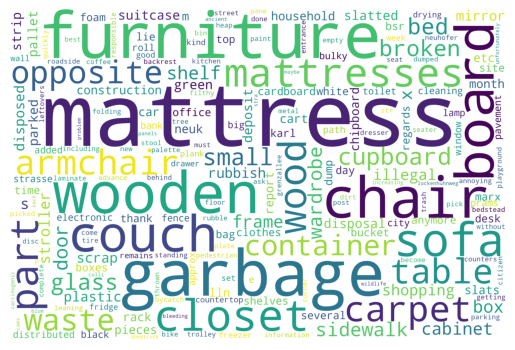

In [36]:
# plt.imshow(word_cloud, interpolation='bilinear')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

###  Highligh the most frequent words (english)

- mattress
- furniture
- chair
- closet
- couch
- sofa
- table
- carpet
- board
- wardrobe
- shelf
- cabinet
- frame
- desk
- cupboard
- stroller
- suitcase


### German
A wordcloud using German language was made to compare with the on in English.
For German, the spowords are not so detailed as in English.

In [32]:
from wordcloud import WordCloud, STOPWORDS

In [33]:
# import dataframe
df_ger_original = pd.read_csv('data/data_ordnungsamt.csv')
# df_ger_original

In [34]:
df_ger_copy = df_ger_original.copy()
# df_ger_copy

In [35]:

df_ger = pd.DataFrame (df_ger_copy, columns = ['sachverhalt'])



In [46]:
df_ger = df_ger.rename({'sachverhalt': 'sperrmull'}, axis=1)
df_ger.head()

,sperrmull
0,Spiegel
1,Holz-/Regalteile
2,Pkw in geschützter Grünanlage aufgefahren
4,Bauschutt
6,Kfz steht in der kurve. Mit plane abgedeckt.


In [37]:
df_ger.isna().sum()

sperrmull    20
dtype: int64

In [38]:
df_ger = df_ger.dropna()
print(df_ger.isna().sum())

sperrmull    0
dtype: int64


In [39]:
df_ger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5388 entries, 0 to 5407
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sperrmull  5388 non-null   object
dtypes: object(1)
memory usage: 84.2+ KB


In [40]:
text_ger = " ".join(cat for cat in df_ger.sperrmull)
# text = " ".join(cat for cat in df.waste) 

In [41]:
STOPWORDS_ger = set(stopwords.words('german'))

In [42]:
# Creating the wordcloud
word_cloud = WordCloud(collocations = False, 
                       background_color = 'white',
                       width=3000,
                       height=2000,
                       random_state=1,
#                       background_color='salmon',
#                       colormap='Pastel1',
                       stopwords=STOPWORDS_ger).generate(text_ger)

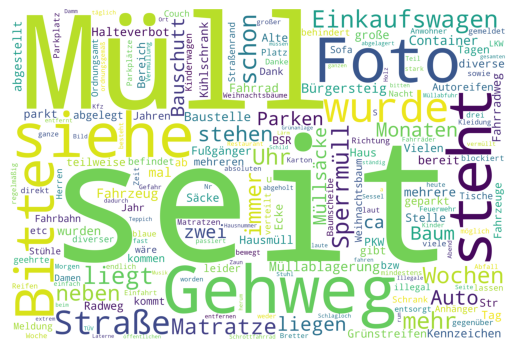

In [43]:
# plt.imshow(word_cloud, interpolation='bilinear')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

###  Highligh the most frequent words (german)
- Einkaufswagen
- Matratze
- Kuhlschrank
- Stuhle
- Fahrrad
- Tische
- Sessel

Einkaufswagen and Sessel were new words here. 

Some possible translations with compound names were included. 

It is possible that Sessel has been translated to chair instead if armchair. So, it was disregarded.

### References:
https://www.ramonvoges.de/posts/Wordcloud/